In [ ]:
import pandas as pd

# Load the uploaded dataset to inspect its contents
file_path = "/content/Auto.csv"
auto_data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Create the binary variable 'mpg01' based on whether 'mpg' is above or below the median value
median_mpg = auto_data['mpg'].median()

# Assign 1 if mpg is above the median, 0 otherwise
auto_data['mpg01'] = (auto_data['mpg'] > median_mpg).astype(int)

# Verify the new column 'mpg01' is added correctly
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


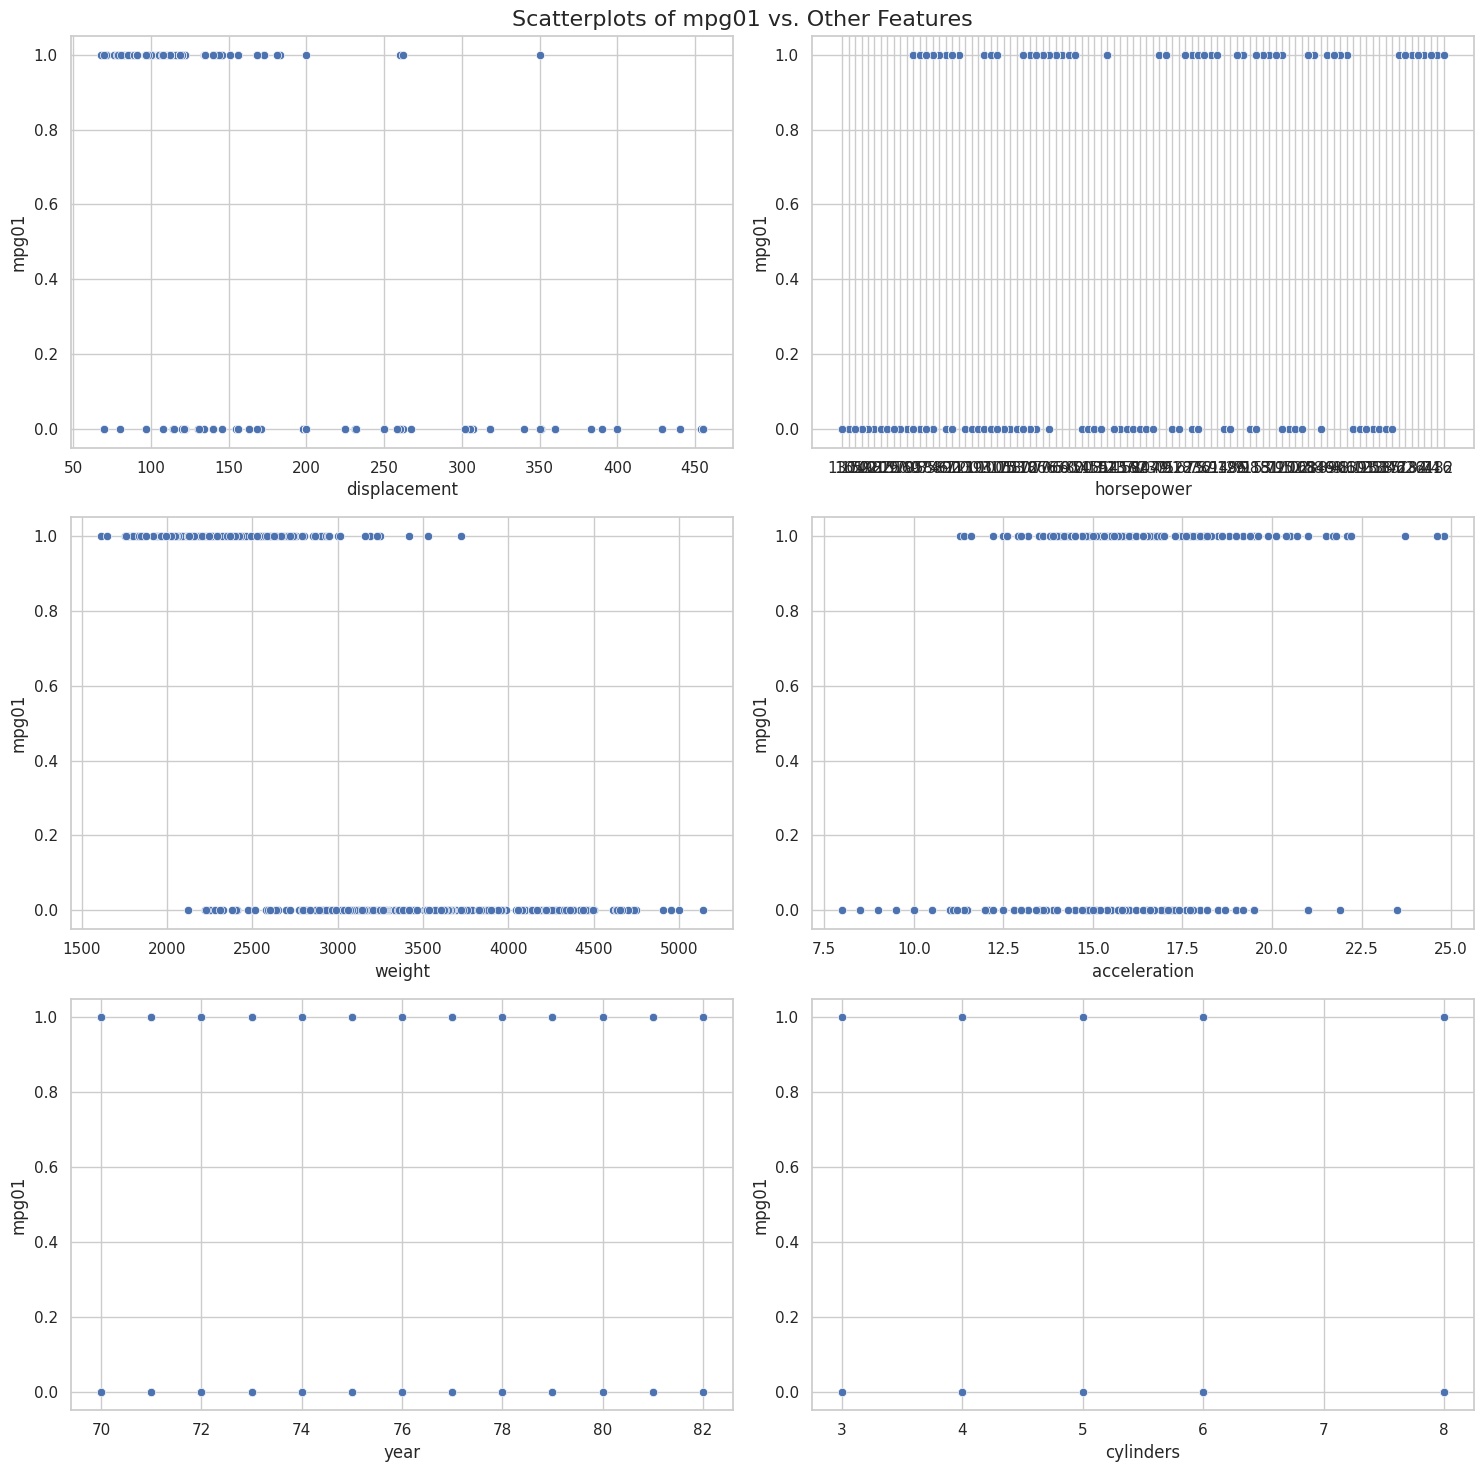

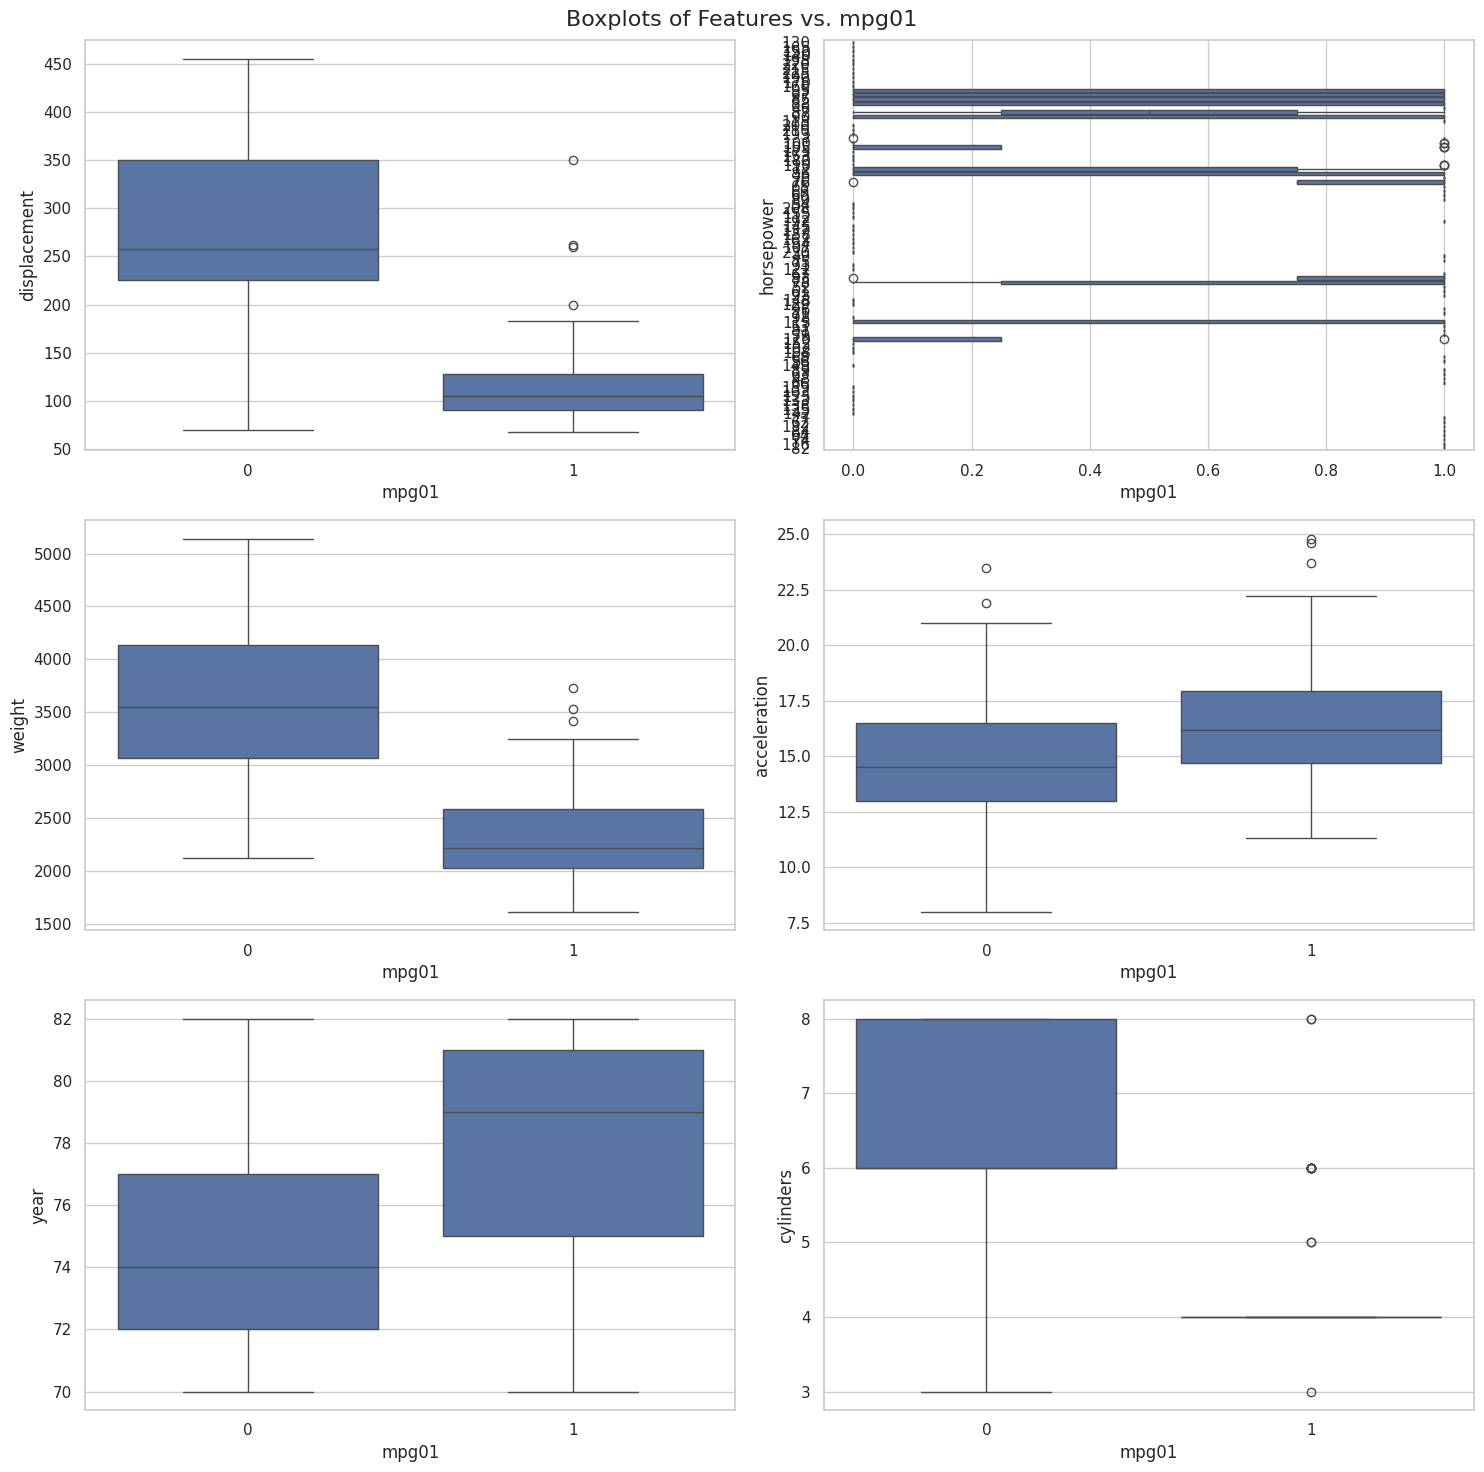

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot aesthetics
sns.set(style="whitegrid")

# Create scatterplots for numerical features vs. mpg01
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Scatterplots: mpg01 vs. numerical features
sns.scatterplot(x='displacement', y='mpg01', data=auto_data, ax=axes[0, 0])
sns.scatterplot(x='horsepower', y='mpg01', data=auto_data, ax=axes[0, 1])
sns.scatterplot(x='weight', y='mpg01', data=auto_data, ax=axes[1, 0])
sns.scatterplot(x='acceleration', y='mpg01', data=auto_data, ax=axes[1, 1])
sns.scatterplot(x='year', y='mpg01', data=auto_data, ax=axes[2, 0])
sns.scatterplot(x='cylinders', y='mpg01', data=auto_data, ax=axes[2, 1])

plt.suptitle("Scatterplots of mpg01 vs. Other Features", fontsize=16)
plt.tight_layout()
plt.show()

# Create boxplots to compare distributions of features across mpg01 categories
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Boxplots: mpg01 vs. numerical features
sns.boxplot(x='mpg01', y='displacement', data=auto_data, ax=axes[0, 0])
sns.boxplot(x='mpg01', y='horsepower', data=auto_data, ax=axes[0, 1])
sns.boxplot(x='mpg01', y='weight', data=auto_data, ax=axes[1, 0])
sns.boxplot(x='mpg01', y='acceleration', data=auto_data, ax=axes[1, 1])
sns.boxplot(x='mpg01', y='year', data=auto_data, ax=axes[2, 0])
sns.boxplot(x='mpg01', y='cylinders', data=auto_data, ax=axes[2, 1])

plt.suptitle("Boxplots of Features vs. mpg01", fontsize=16)
plt.tight_layout()
plt.show()

From the above scatterplots and boxplots, we can arrive at some key observations:-

1.) Weight and Displacement:


*   Both weight and displacement show a strong negative association with "mpg01"
*   Cars with higher gas mileage (mpg01=1) tend to have lower weight and displacment.

2.) Horsepower:


*   Similar to weight and displacement, higher horsepower correlates with lower gas mileage. The boxplots show a clear difference between the two categories, with higher mileage cars generally having lower horsepower.

3.) Cylinders:


*   There is a clear trend that cars with lesser cylinders tend to have higher gas mileage.

4.) Year:

*   New model years are associated with higher gas mileage. This tells that newer cars are generally more fuel-efficient.

5.) Acceleration:


*   There seems to be less difference in acceleration between the two mileage categories.

Thus, we can conclude that "weight", "displacement", "horsepower", "cylinders" and "year" are the most useful features for predicting whether a car will have high gas mileage or a lower gas mileage.











In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = auto_data.drop(['mpg', 'mpg01', 'name'], axis=1)  # Exclude mpg01 (target) and name (non-numeric)
y = auto_data['mpg01']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the size of each set to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((277, 7), (120, 7), (277,), (120,))

The data has been successfully split into 277 samples of "Training set (70%)" and 120 samples of "Test set (30%)".

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Assuming you want to select only the 'horsepower' column, adjust if needed
X_train_selected = X_train[['horsepower']]  # Create X_train_selected from X_train
X_test_selected = X_test[['horsepower']]  # Create X_test_selected from X_test


# Clean the 'horsepower' column in both train and test sets
X_train_selected['horsepower'] = pd.to_numeric(X_train_selected['horsepower'], errors='coerce')
X_test_selected['horsepower'] = pd.to_numeric(X_test_selected['horsepower'], errors='coerce')

# Drop rows with missing values in both training and test data
X_train_selected = X_train_selected.dropna()
y_train = y_train.loc[X_train_selected.index]

X_test_selected = X_test_selected.dropna()
y_test = y_test.loc[X_test_selected.index]

# Define the K values to test
k_values = [1, 3, 5, 7, 9, 11, 15, 20]
test_errors = []

# Perform KNN for each K value and store the test errors
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_selected, y_train)
    y_pred = knn.predict(X_test_selected)
    error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(error)

# Display the test errors for each K
for k, error in zip(k_values, test_errors):
    print(f"K = {k}: Test Error = {error:.4f}")

<ipython-input-6-06c9c0b4ff10>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected['horsepower'] = pd.to_numeric(X_train_selected['horsepower'], errors='coerce')
<ipython-input-6-06c9c0b4ff10>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected['horsepower'] = pd.to_numeric(X_test_selected['horsepower'], errors='coerce')


K = 1: Test Error = 0.2119
K = 3: Test Error = 0.2119
K = 5: Test Error = 0.1864
K = 7: Test Error = 0.1864
K = 9: Test Error = 0.1949
K = 11: Test Error = 0.2288
K = 15: Test Error = 0.2119
K = 20: Test Error = 0.1864


The lowest test error happens when K = 1,but, the smaller K values can eventually lead to overfitting. A value of K = 3 or K = 7 might be a good option.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Select the relevant features from the dataset
pca_features = auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].copy()

# Convert 'horsepower' to numeric and drop rows with missing values
pca_features['horsepower'] = pd.to_numeric(pca_features['horsepower'], errors='coerce')
pca_features = pca_features.dropna()

# Perform PCA on non-scaled data (raw features)
pca_raw = PCA()
pca_raw_transformed = pca_raw.fit_transform(pca_features)  # Use raw, non-scaled data
explained_variance_ratio_raw = pca_raw.explained_variance_ratio_

# Display the explained variance ratios for each component
for i, ratio in enumerate(explained_variance_ratio_raw, start=1):
    print(f"PC{i}: Explained Variance = {ratio:.6f}")

PC1: Explained Variance = 0.997579
PC2: Explained Variance = 0.002062
PC3: Explained Variance = 0.000355
PC4: Explained Variance = 0.000004
PC5: Explained Variance = 0.000000


Here, the first principal component (PC1) only takes 99.75% of the total variance, while the other principal components explain very little.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
pca_features_scaled = scaler.fit_transform(pca_features)

# Perform PCA on the standardized data
pca_standardized = PCA()
pca_standardized_transformed = pca_standardized.fit_transform(pca_features_scaled)
explained_variance_ratio_standardized = pca_standardized.explained_variance_ratio_

# Display the explained variance ratios for both raw and standardized PCA
comparison_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio_raw))],
    'Explained Variance (Raw)': explained_variance_ratio_raw,
    'Explained Variance (Standardized)': explained_variance_ratio_standardized
})

print(comparison_df)

  Component  Explained Variance (Raw)  Explained Variance (Standardized)
0       PC1              9.975787e-01                           0.814372
1       PC2              2.061651e-03                           0.138772
2       PC3              3.552739e-04                           0.026699
3       PC4              3.956431e-06                           0.012854
4       PC5              3.727475e-07                           0.007303


The difference between the PCA analysis of raw data and the standardized data is that the first component (PC1) captures almost all the variance, indicating that features with larger magnitudes dominate the result.

Whereas, in the standardized data, the variance is more evenly distributed across the components. The first two components captures 94% of the variance implying that all features contribute meaningfully when scaled.